In [1]:
import pandas as pd
import numpy as np
np.float_ = np.float64

from src.create_data_files import combine_files, create_matrix, plot_processed_data, create_processed_file
from src.model_testing import ModelTesting

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

main_folder = "ctu-chb/"
data_folder = main_folder + 'data/'
hea_folder = main_folder + 'extra/'

# Preprocesar ficheros

### Preprocesar datos y unificarlos en un archivo

In [3]:
# Convine all csv in a single file
combine_files(data_folder, main_folder)

# Process the convined data and store in another file
create_processed_file(main_folder)

padded: 0


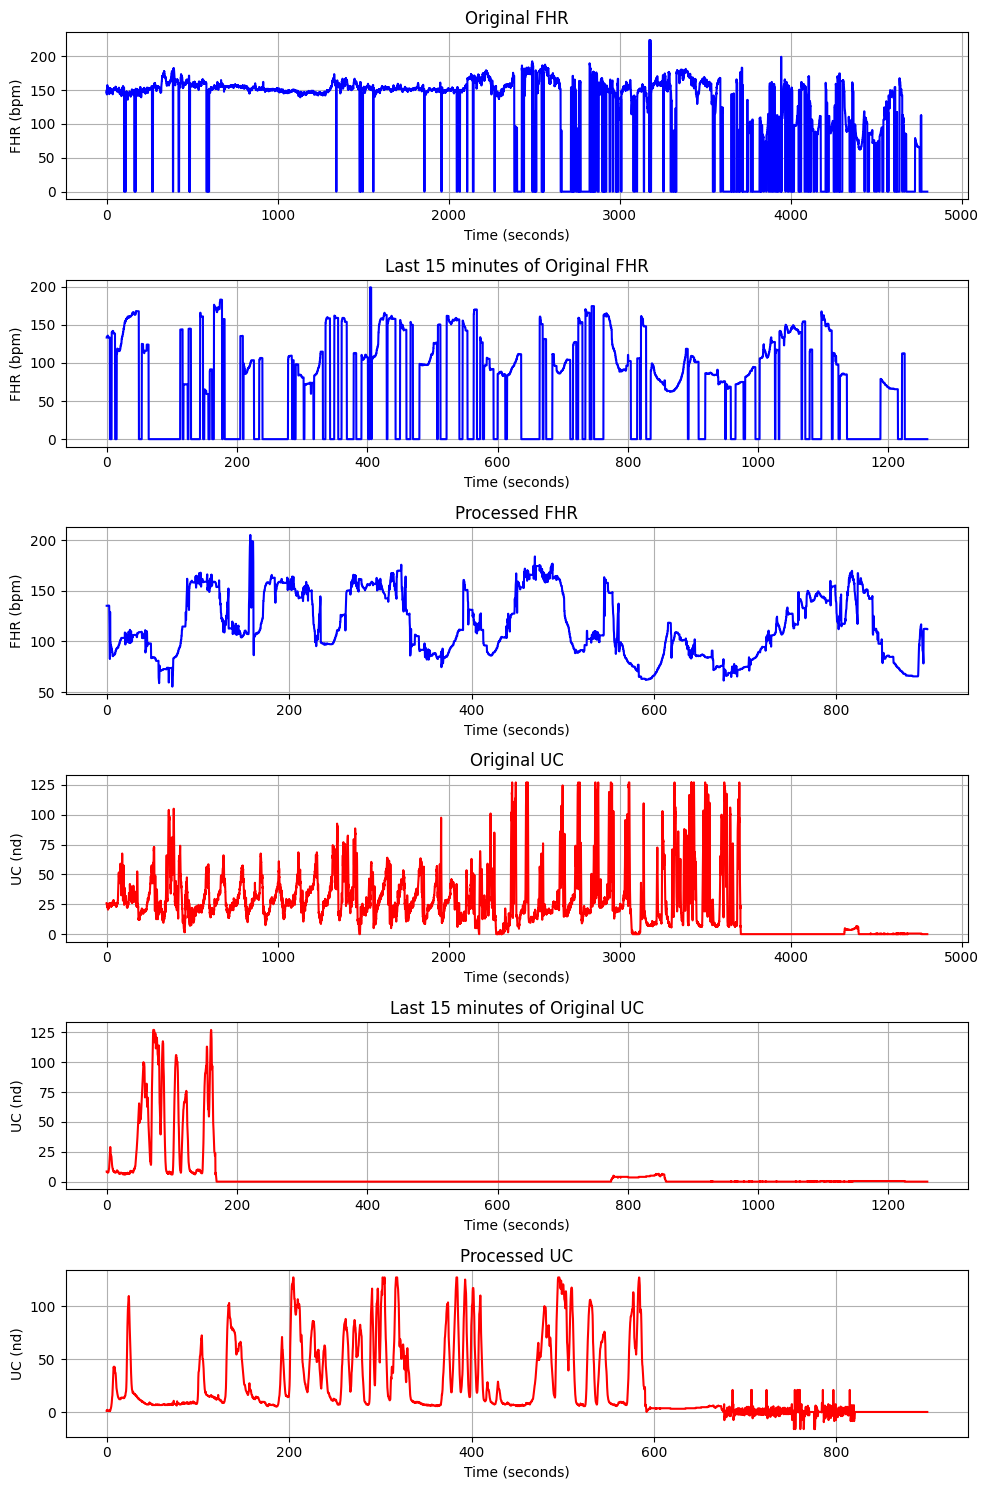

In [4]:
###### Plot the original and processed data to see the differences #####
plot_processed_data("1002", data_folder, main_folder)

### Crear archivos de características

In [2]:
##### Create a matrix with the features and the class #####
create_matrix(hea_folder, main_folder, ['linear'])
create_matrix(hea_folder, main_folder, ['nonlinear'])
create_matrix(hea_folder, main_folder, ['morphological'])

create_matrix(hea_folder, main_folder, ['linear', 'nonlinear'])
create_matrix(hea_folder, main_folder, ['linear', 'morphological'])
create_matrix(hea_folder, main_folder, ['nonlinear', 'morphological'])

create_matrix(hea_folder, main_folder, ['linear', 'nonlinear', 'morphological'])

c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\src\nonlinear_features.py:106: RuntimeWarning: divide by zero encountered in scalar divide
  saen = np.log(correl[0]/correl[1])
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\src\nonlinear_features.py:106: RuntimeWarning: invalid value encountered in scalar divide
  saen = np.log(correl[0]/correl[1])


In [3]:
# Show features file
df = pd.read_csv(main_folder + 'linear_nonlin_morpho' + '_features.csv')
df.head()

,FileName,mean,std,LTV,delta,STV,II,ApEn_0.15,ApEn_0.20,SampEn_0.15,SampEn_0.20,LZC,baseline,dcc,acc,pH
0,1001,127.205231,25.457277,15.870798,49.926961,4.725971,0.189027,0.012657,0.012657,inf,inf,0.761333,136.259098,7,6,1
1,1002,115.886399,31.844421,15.083261,78.502254,5.798497,0.184993,0.012657,0.012657,inf,inf,0.764614,109.416508,8,8,1
2,1003,105.341886,23.047058,14.430199,34.675755,3.800214,0.166854,0.072027,0.079750,3.135494,3.218876,0.721953,107.814791,4,3,1
3,1004,115.188778,29.944229,15.051635,66.550000,6.034638,0.203417,0.054187,0.054187,inf,inf,0.761333,113.886710,10,11,0
4,1005,107.739042,23.225772,14.605183,59.028109,5.651580,0.253107,0.028103,0.028103,inf,inf,0.718672,108.441821,6,5,0


# Clasificadores

In [2]:
models = [
    {"name": "Logistic Regression", 
        "model": LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear'), 
        "params": {
            'C': np.logspace(-3, 4, num=8),
            'penalty': ['l1', 'l2']
        },
        "standardize": True
    },
    {"name": "SVC lineal", 
        "model": SVC(kernel='linear', class_weight='balanced'), 
        "params": {
            'C': np.logspace(-3, 4, num=8)
        },
        "standardize": True
    },
    {"name": "SVC radial", 
        "model": SVC(kernel='rbf', class_weight='balanced'), 
        "params": {
            'C': np.logspace(-3, 4, num=8), 
            'gamma': np.logspace(-4, 3, num=8)
        },
        "standardize": True
    },
    {"name": "SVC polinómico", 
        "model": SVC(kernel='poly', class_weight='balanced'), 
        "params": {
            'C': np.logspace(-3, 4, num=8), 
            'degree': [2, 3, 4], 
            'coef0': [0.0, 0.5, 1.0]
        },
        "standardize": True
    },
    {"name": "SVC sigmoide", 
        "model": SVC(kernel='sigmoid', class_weight='balanced'), 
        "params": {
            'C': np.logspace(-3, 4, num=8), 
            'gamma': ['scale', 'auto', 0.1, 1.0, 10], 
            'coef0': [0.0, 0.5, 1.0]
        },
        "standardize": True
    },
    {"name": "Random Forest", 
        "model": RandomForestClassifier(class_weight='balanced', n_jobs=-1), 
        "params": {
            'n_estimators': [50, 100, 200]
        },
        "standardize": False
    },
    {"name": "MLP", 
        "model": MLPClassifier(max_iter=1000), 
        "params": {
            'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 100), (200, 200), (50, 50, 50), (100, 100, 100)],  
            'alpha': [0.0001, 0.001, 0.01],  
        },  
        "standardize": True
    },
    {"name": "KNN", 
        "model": KNeighborsClassifier(), 
        "params": {
            'n_neighbors': [3, 5, 7, 9], 
            'weights': ['uniform', 'distance']
        },
        "standardize": True
    }
]


features = [
    {"name": "Lineales", "file_name": "linear_features.csv"},
    {"name": "No lineales", "file_name": "nonlinear_features.csv"},
    {"name": "Morfológicas", "file_name": "morphological_features.csv"},
    {"name": "Lineales y no lineales", "file_name": "linear_nonlin_features.csv"},
    {"name": "Lineales y morfológicas", "file_name": "linear_morpho_features.csv"},
    {"name": "No lineales y morfológicas", "file_name": "nonlin_morpho_features.csv"},
    {"name": "Todas", "file_name": "linear_nonlin_morpho_features.csv"}
]

# Entrenamiento

In [4]:
! pip install Jinja2
! pip freeze > requirements.txt

  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl (15 kB)


In [8]:
# Diccionary to store the results
resultados_acc = {model["name"]: [] for model in models}
resultados_f1 = {model["name"]: [] for model in models}

# Iterate over models and features
for model in models:
    for feature in features:
        print(f"Modelo: {model['name']} \n\tCaracterísticas: {feature['name']}")

        model_test = ModelTesting(
            model['model'],
            file_name=feature['file_name'],
            standardize=model['standardize'],
            main_folder=main_folder
        )
        
        # Trains the model with cross-validation and hyperparameter search
        results = model_test.train_model(
            param_grid=model["params"],
            report=True
        )

        # Store the result in the dictionary
        resultados_acc[model["name"]].append(results[0])
        resultados_f1[model["name"]].append(results[1])

# Create DataFrames with the results
acc_df = pd.DataFrame(resultados_acc, index=[feature["name"] for feature in features]).map(lambda x: f"{x:.3f}")
f1_df = pd.DataFrame(resultados_f1, index=[feature["name"] for feature in features]).map(lambda x: f"{x:.3f}")

# Function to highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #d9b8d0; color: black' if v else '' for v in is_max]

acc_df = acc_df.style.apply(highlight_max, axis=0)
f1_df = f1_df.style.apply(highlight_max, axis=0)

Modelo: Logistic Regression 
	Características: Lineales
	Best Parameters: {'C': np.float64(1.0), 'penalty': 'l2'}
	Accuracy: 0.6377
	Balanced Accuracy: 0.6345

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       358
           1       0.49      0.62      0.55       194

    accuracy                           0.64       552
   macro avg       0.62      0.63      0.62       552
weighted avg       0.66      0.64      0.65       552
 

Modelo: Logistic Regression 
	Características: No lineales
	Best Parameters: {'C': np.float64(0.1), 'penalty': 'l2'}
	Accuracy: 0.5254
	Balanced Accuracy: 0.5845

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.39      0.51       358
           1       0.41      0.78      0.54       194

    accuracy                           0.53       552
   macro avg       0.59      0.58      0.53       552
weighted avg       0.64      0

c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


	Best Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (50,)}
	Accuracy: 0.6757
	Balanced Accuracy: 0.5953

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       358
           1       0.57      0.32      0.41       194

    accuracy                           0.68       552
   macro avg       0.64      0.60      0.59       552
weighted avg       0.66      0.68      0.65       552
 

Modelo: MLP 
	Características: No lineales
	Best Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}
	Accuracy: 0.6087
	Balanced Accuracy: 0.5307

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       358
           1       0.41      0.27      0.33       194

    accuracy                           0.61       552
   macro avg       0.54      0.53      0.52       552
weighted avg       0.58      0.61      0.58       552
 

Modelo: MLP 
	Características:

c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\claud\Desktop\Clau\Uni\4\1Cuatri\DAHFI\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the opti

	Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
	Accuracy: 0.6159
	Balanced Accuracy: 0.5445

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       358
           1       0.43      0.30      0.36       194

    accuracy                           0.62       552
   macro avg       0.55      0.54      0.54       552
weighted avg       0.59      0.62      0.60       552
 

Modelo: MLP 
	Características: Todas
	Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (200, 200)}
	Accuracy: 0.6359
	Balanced Accuracy: 0.5953

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       358
           1       0.48      0.46      0.47       194

    accuracy                           0.64       552
   macro avg       0.60      0.60      0.60       552
weighted avg       0.63      0.64      0.63       552
 

Modelo: KNN 
	Características: L

# Resultados

### Balanced accuracy

In [9]:
acc_df

,Logistic Regression,SVC lineal,SVC radial,SVC polinómico,SVC sigmoide,Random Forest,MLP,KNN
Lineales,0.634,0.635,0.634,0.631,0.626,0.590,0.595,0.614
No lineales,0.584,0.581,0.617,0.613,0.572,0.521,0.531,0.557
Morfológicas,0.617,0.618,0.621,0.615,0.623,0.532,0.564,0.588
Lineales y no lineales,0.644,0.648,0.656,0.664,0.643,0.604,0.599,0.626
Lineales y morfológicas,0.659,0.662,0.655,0.643,0.639,0.599,0.622,0.610
No lineales y morfológicas,0.608,0.594,0.614,0.630,0.598,0.541,0.545,0.549
Todas,0.652,0.655,0.671,0.662,0.647,0.599,0.595,0.610


### F1 Score

In [10]:
f1_df

,Logistic Regression,SVC lineal,SVC radial,SVC polinómico,SVC sigmoide,Random Forest,MLP,KNN
Lineales,0.645,0.651,0.626,0.648,0.612,0.642,0.648,0.662
No lineales,0.521,0.506,0.596,0.593,0.487,0.574,0.584,0.607
Morfológicas,0.616,0.614,0.610,0.609,0.616,0.581,0.614,0.638
Lineales y no lineales,0.635,0.666,0.649,0.663,0.600,0.656,0.642,0.672
Lineales y morfológicas,0.673,0.682,0.667,0.654,0.637,0.651,0.657,0.660
No lineales y morfológicas,0.605,0.585,0.601,0.617,0.574,0.595,0.597,0.601
Todas,0.673,0.658,0.675,0.677,0.639,0.650,0.634,0.654


### Matriz de confusión para un modelo

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV

# The model to be evaluated
model = SVC(kernel='poly', class_weight='balanced')
param_grid = {
    'C': np.logspace(-3, 4, num=8), 
    'degree': [2, 3, 4], 
    'coef0': [0.0, 0.5, 1.0]
}


# Evaluate the model with each feature set
confusion_matrices = {}
for feature in features:    
    model_test = ModelTesting(
        model,
        file_name=feature['file_name'],
        standardize=True,
        main_folder=main_folder
    )
    
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    grid_search.fit(model_test.X, model_test.y)
    
    model.set_params(**grid_search.best_params_)
    y_pred_cv = cross_val_predict(model, model_test.X, model_test.y, cv=cv)
    
    # Confusion matrix
    cm = confusion_matrix(model_test.y, y_pred_cv)
    
    # Store the confusion matrix in a DataFrame
    cm_df = pd.DataFrame(cm, index=np.unique(model_test.y), columns=np.unique(model_test.y))
    confusion_matrices[feature['name']] = cm_df
    
    
# Print the confusion matrices
for feature_name, cm_df in confusion_matrices.items():
    print(f"\n{feature_name}")
    print(cm_df)